# Second Hand Cars Re-Selling Price Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np  #to do mathematical functions in python use numpy
import pandas as pd  #to read a dataset,to do data cleaning works we can use pandas library
import matplotlib.pyplot as plt #plot for data visualization
import seaborn as sns  #to draw informative & attractive data visualization with more customizable approach
import statsmodels.api as sm  #to work with statistical models,statistical data explanation
import os #importing python platform
sns.set() #to set specific theme when working with diff versions

from math import * #import all the mathematical functions
import warnings #to ignore warnings
warnings.filterwarnings('ignore')


# Loading the Raw Data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ML 02/Week 01/Second hand cars reselling price.csv')

In [6]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [7]:
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


In [8]:
data.shape

(4345, 9)

In [9]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Data Preprocessing

In [10]:
data.describe(include='all')    #to identify the structure of the data with statistical

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [11]:
data.isnull().sum()   #to count the total number of missing values in each column  

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

# Determine the Variables of interest

In [12]:
data1 = data.drop(['Model'],axis = 1)    #with lot of repetition in data under model column hence we remove remove that column

In [13]:
data1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [14]:
data1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [15]:
data_no_mv=data1.dropna(axis=0)   #axis=1 for columns,axis=0 rows #to drop rows as price and EngineV contains many null values

In [16]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

# Dealing with outliers

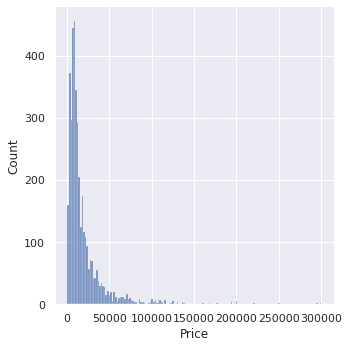

In [17]:
sns.displot(data_no_mv['Price'])
plt.show()

In [18]:
q = data_no_mv['Price'].quantile(0.99)    #keep 99% in decimals
data_1 = data_no_mv[data_no_mv['Price'] < q] 
data_1.describe()                           #no_mv means there's is no missing values

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


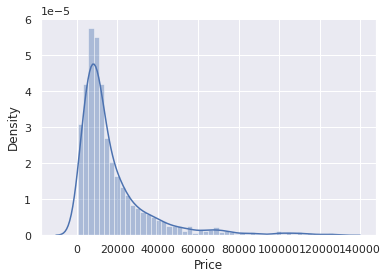

In [19]:
sns.distplot(data_1['Price'])
plt.show()

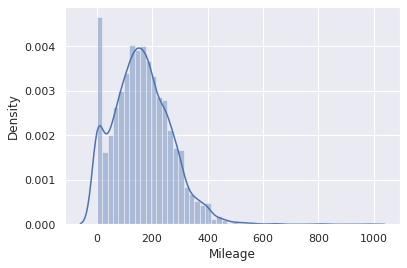

In [20]:
sns.distplot(data_no_mv['Mileage'])
plt.show()

In [21]:
q = data_1['Mileage'].quantile(0.99)    #keep 99% in decimals #since the distribution is postively skewed we remove from right side maximum values
data_2 = data_1[data_1['Mileage'] < q] 
data_2.describe() 

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


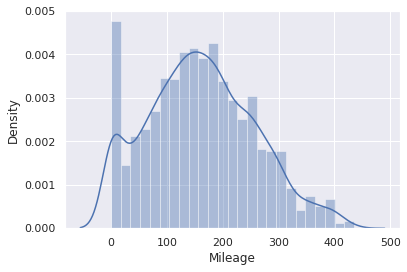

In [22]:
sns.distplot(data_2['Mileage'])
plt.show()

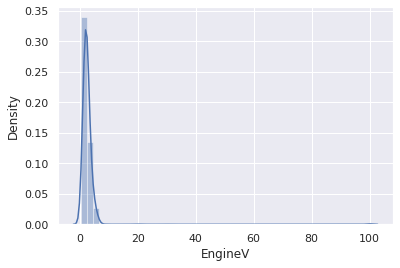

In [23]:
sns.distplot(data_no_mv['EngineV'])
plt.show()

In [24]:
    #keep 6.5% in decimals
data_3 = data_2[data_2['EngineV'] < 6.5]    #cars engine volume is between the range from 0-6.5 that us why we are removing data that exceed that range 6.5.
data_3.describe() 

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


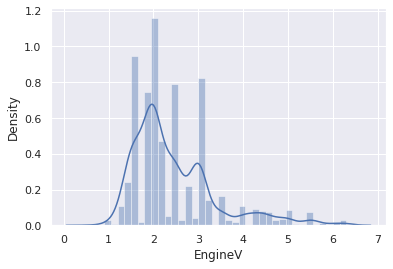

In [25]:
sns.distplot(data_3['EngineV'])
plt.show()

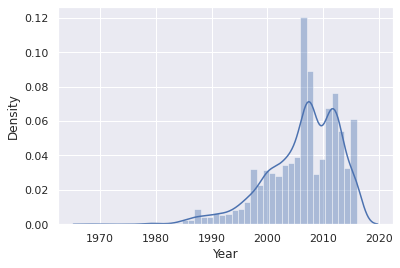

In [26]:
sns.distplot(data_3['Year'])
plt.show()

In [27]:
q = data_3['Year'].quantile(0.01) #since this is left skewed we remove from the first 1% of the data to remove the outliers
data_4 = data_3[data_3['Year'] > q]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


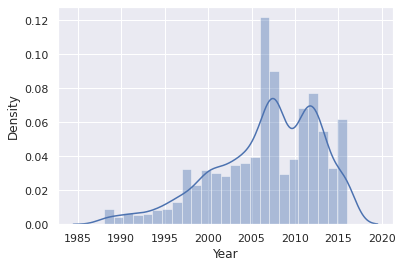

In [28]:
sns.distplot(data_4['Year'])
plt.show()

In [29]:
data_cleaned = data_4.reset_index(drop=True)  #current index will be deleted
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [30]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS assumptions

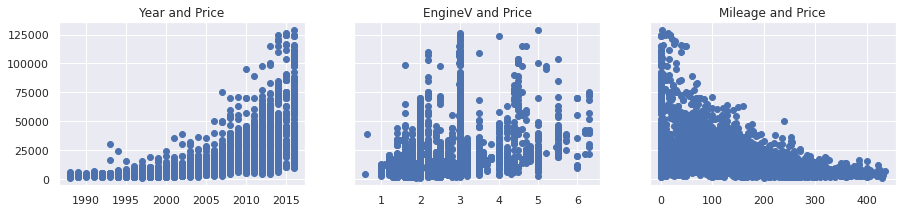

In [31]:
#plotting all indepedent variables against our dependent variable "Price"

f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Year and Price')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('EngineV and Price')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Mileage and Price')

plt.show()

# Log Transformation

In [32]:
# to stabilize the variance,to normalized the distribution

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


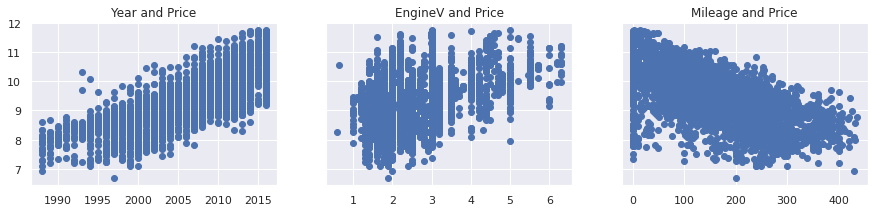

In [33]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Year and Price')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('EngineV and Price')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Mileage and Price')

plt.show()        #the plots are linear when looking vertical lines at each year,engine vol and mileage

In [34]:
data_cleaned = data_cleaned.drop(['Price'],axis = 1)

In [35]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


# Removing Multicollinearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [37]:
vif       #VIF the highest feature is Year out of all features or features VIF greater than 10

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [38]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)  #we drop Year variable

In [39]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


# Creating Dummies

In [40]:
# converting categorical data into numrical format we create dummy variables

In [41]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [42]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [43]:
cols = ['log_price','Mileage','EngineV','Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [44]:
data_preprocessed=data_with_dummies[cols]

In [45]:
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Downloading Preprocessed Data


In [46]:
data_preprocessed.to_csv('data_preprocessed.csv')
data_preprocessed = pd.read_csv('data_preprocessed.csv')

# Linear Regression Model

In [47]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'] , axis = 1)

# Scaling the data

In [48]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [49]:
scalar = StandardScaler()
scalar.fit(inputs)

StandardScaler()

In [50]:
inputs_scaled = scalar.transform(inputs)

# Splitting the dataset as test and train set

In [51]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(inputs_scaled , targets , test_size = 0.25 , random_state = 365)

In [52]:
x_train

array([[ 1.52377477, -0.44490826, -0.89591293, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 1.50137949,  0.25577519, -0.26383071, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 0.6987327 ,  1.92904912, -0.57987182, ..., -0.16209221,
        -0.75037043, -3.11164272],
       ...,
       [-1.01405823,  0.64271979,  3.21262147, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 0.7229196 ,  1.24928159,  0.05221039, ...,  6.16932785,
        -0.75037043, -3.11164272],
       [ 1.55244073, -0.58086177, -0.47452478, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [53]:
y_train

3634     9.433484
3609     9.464983
2713     8.318742
1229     9.449357
1735     8.779404
          ...    
428     11.074421
859     10.434116
801      9.928180
2740     7.824046
3666    10.488493
Name: log_price, Length: 2900, dtype: float64

# Creating the Regression

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [55]:
yhat = reg.predict(x_train)

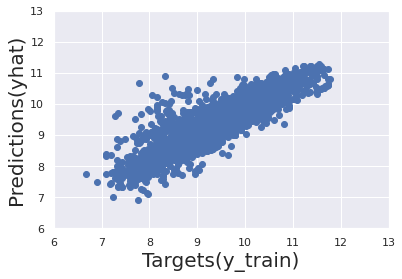

In [56]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

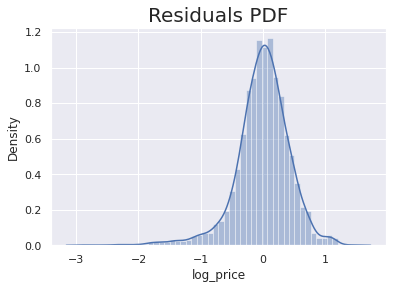

In [57]:
sns.distplot(y_train - yhat)
plt.title("Residuals PDF" , size = 20)
plt.show()

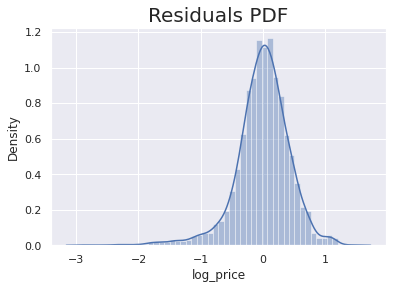

In [58]:
sns.distplot(y_train - yhat)
plt.title("Residuals PDF" , size = 20)
plt.show()

In [59]:
reg.score(x_train , y_train)

0.7510953340203845

# Finding the weighs and bias

In [60]:
reg.intercept_

9.417778680040557

In [61]:
reg.coef_

array([ 7.94367227e-05, -4.53360928e-01,  2.09779824e-01, -8.89808683e-05,
        3.68923769e-03, -1.45316904e-01, -1.90191299e-01, -6.98039069e-02,
       -9.93064860e-02, -1.46073802e-01, -1.01423181e-01, -2.04318303e-01,
       -1.24424036e-01, -1.67834984e-01, -1.20296806e-01, -3.81914163e-02,
       -1.50948831e-01,  3.20337110e-01])

In [62]:
reg_summary = pd.DataFrame(inputs.columns.values , columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Unnamed: 0,0.000079
1,Mileage,-0.453361
2,EngineV,0.209780
3,Brand_BMW,-0.000089
4,Brand_Mercedes-Benz,0.003689
5,Brand_Mitsubishi,-0.145317
6,Brand_Renault,-0.190191
7,Brand_Toyota,-0.069804
8,Brand_Volkswagen,-0.099306
9,Body_hatch,-0.146074


In [63]:
y_hat_test = reg.predict(x_test)

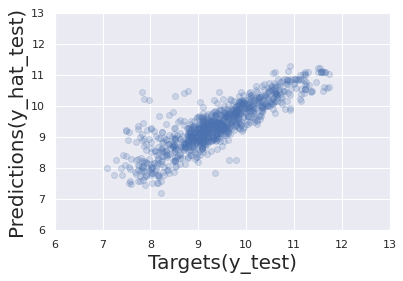

In [64]:
plt.scatter(y_test , y_hat_test , alpha = 0.2)
plt.xlabel('Targets(y_test)',fontsize=20)
plt.ylabel('Predictions(y_hat_test)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [65]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ['Predictions'])
df_pf.head()

,Predictions
0,10620.814674
1,3489.277749
2,7436.122081
3,7452.030901
4,11296.676589


In [66]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10620.814674,2300.0
1,3489.277749,2800.0
2,7436.122081,2500.0
3,7452.030901,6400.0
4,11296.676589,9150.0
...,...,...
962,3797.194409,2500.0
963,10731.508461,16500.0
964,30674.187875,40500.0
965,11276.556391,8200.0


In [67]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,10620.814674,2300.0,-8320.814674,361.774551
1,3489.277749,2800.0,-689.277749,24.617062
2,7436.122081,2500.0,-4936.122081,197.444883
3,7452.030901,6400.0,-1052.030901,16.437983
4,11296.676589,9150.0,-2146.676589,23.460946
...,...,...,...,...
962,3797.194409,2500.0,-1297.194409,51.887776
963,10731.508461,16500.0,5768.491539,34.960555
964,30674.187875,40500.0,9825.812125,24.261265
965,11276.556391,8200.0,-3076.556391,37.518980


In [68]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,967.000000,967.000000,967.000000,967.000000
mean,15907.764830,17841.522058,1933.757228,39.127282
std,13176.701424,19416.925011,10439.427404,77.722558
min,1341.922689,1200.000000,-31976.953658,0.044796
25%,7378.855797,6900.000000,-2100.287826,11.006692
50%,11648.416233,11400.000000,75.934644,23.653678
75%,19992.451291,20200.000000,3125.552912,40.216906
max,80302.366823,126000.000000,84777.135829,1279.078146


In [69]:
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
698,30513.662656,30500.00,-13.662656,0.044796
907,3802.752186,3800.00,-2.752186,0.072426
549,3754.183365,3750.00,-4.183365,0.111556
272,9816.665911,9800.00,-16.665911,0.170060
883,36063.235499,36000.00,-63.235499,0.175654
380,3493.695693,3500.00,6.304307,0.180123
110,25550.108898,25500.00,-50.108898,0.196505
102,28958.394904,28900.00,-58.394904,0.202058
379,17841.207138,17800.00,-41.207138,0.231501
630,8775.943667,8800.00,24.056333,0.273367


# Conclusion

Model fits the data well further we can check the accuracy of the model as well.